In [3]:
text='지금은 전 세계가 한 마을이 되었다'
sents=text.split(' ')
print(sents)

['지금은', '전', '세계가', '한', '마을이', '되었다']


In [4]:
from sagas.nlu.google_translator import translate
source='ko'
target='en'
verbose=False
res,t = translate(text, source=source, target=target,
                        trans_verbose=verbose)
print(res)
print(t)

Now the whole world has become a village.
[]


In [29]:
import pyttsx3
engine = pyttsx3.init()
voices = engine.getProperty('voices')       #getting details of current voice
langs=[v.languages[0] for v in voices]
ids=[v.id for v in voices]
langs_map=dict(zip(langs,ids))
print(langs_map)

{'en_US': 'com.apple.speech.synthesis.voice.Victoria', 'it_IT': 'com.apple.speech.synthesis.voice.luca', 'sv_SE': 'com.apple.speech.synthesis.voice.alva', 'fr_CA': 'com.apple.speech.synthesis.voice.amelie', 'de_DE': 'com.apple.speech.synthesis.voice.anna', 'he_IL': 'com.apple.speech.synthesis.voice.carmit', 'id_ID': 'com.apple.speech.synthesis.voice.damayanti', 'en_GB': 'com.apple.speech.synthesis.voice.daniel', 'es_AR': 'com.apple.speech.synthesis.voice.diego', 'nl_BE': 'com.apple.speech.synthesis.voice.ellen', 'en-scotland': 'com.apple.speech.synthesis.voice.fiona', 'ro_RO': 'com.apple.speech.synthesis.voice.ioana', 'pt_PT': 'com.apple.speech.synthesis.voice.joana', 'es_ES': 'com.apple.speech.synthesis.voice.monica', 'es_MX': 'com.apple.speech.synthesis.voice.paulina', 'th_TH': 'com.apple.speech.synthesis.voice.kanya', 'en_AU': 'com.apple.speech.synthesis.voice.karen', 'ja_JP': 'com.apple.speech.synthesis.voice.kyoko', 'sk_SK': 'com.apple.speech.synthesis.voice.laura', 'hi_IN': 'com.

In [38]:
def say_in(sents, lang, rate=200):
    engine.setProperty('rate', rate)     # setting up new voice rate
    engine.setProperty('voice', langs_map[lang])
    engine.say(sents)
    engine.runAndWait()
say_in('지금은 전 세계가 한 마을이 되었다', 'ko_KR', 150)

In [39]:
say_in('지금은 전 세계가 한 마을이 되었다', 'ko_KR', 200)

In [32]:
rate = engine.getProperty('rate')   # getting details of current speaking rate
print (rate)                        #printing current voice rate

200.0


In [34]:
engine.setProperty('rate', 125)     # setting up new voice rate

In [21]:
import pyttsx3
engine = pyttsx3.init()
engine.say("I will speak this text")
engine.runAndWait()

In [45]:
import time
from sagas.nlu.nlu_tools import NluTools
def process(source, target, text, ips_idx=1):
    options=set(['get_pronounce'])
    # options.add('get_pronounce')
    res,t = translate(text, source=source, target=target,
                      trans_verbose=verbose, options=options)
    # print(res, text, t[ips_idx])
    print('✁', '%s(%s %s)'%(text, res, t[ips_idx]))
    for sent in text.split(' '):
        res,t = translate(sent, source=source, target=target,
                          trans_verbose=verbose, options=options)
        # print(res, sent, t[ips_idx])
        print('%s(%s,%s)'%(sent,res,t[ips_idx][1:]), end =" ")
        time.sleep(0.05)
    print('.')

text='지금은 전 세계가 한 마을이 되었다'
target='zh-CN'
process('ko', target, text)
NluTools().say(text, 'ko')

✁ 지금은 전 세계가 한 마을이 되었다(现在整个世界都变成了一个村庄。 ❣ jigeum-eun jeon segyega han ma-eul-i doeeossda)
지금은(现在, jigeum-eun) 전(的, jeon) 세계가(世界, segyega) 한(一, han) 마을이(镇, ma-eul-i) 되었다(是的, doeeossda) .
speak language with ko ...
done.


In [53]:
def analyse_ko(text):
    target='zh-CN'
    process('ko', target, text)
    NluTools().say(text, 'ko')
analyse_ko('유전이 발견되었죠.')

✁ 유전이 발견되었죠.(发现了油田。 ❣ yujeon-i balgyeondoeeossjyo.)
유전이(遗传, yujeon-i) 발견되었죠.(它成为发现。, balgyeondoeeossjyo.) .
speak language with ko ...
done.


In [57]:
# def analyse_ar(text):
#     target='zh-CN'
#     process('ar', target, text, 0)
#     NluTools().say(text, 'ar')
# analyse_ko('مع جور هوبيمان,ايمر كامينيكا, وي جانج')

In [54]:
analyse_ko('그렇게 큰 규모는 아니었습니다.')

✁ 그렇게 큰 규모는 아니었습니다.(它不是那么大。 ❣ geuleohge keun gyumoneun anieossseubnida.)
그렇게(所以, geuleohge) 큰(伟大, keun) 규모는(规模, gyumoneun) 아니었습니다.(事实并非如此。, anieossseubnida.) .
speak language with ko ...
done.


In [46]:
def analyse(sents_zh):
    # translate from chinese to korea
    sents_ko,_ = translate(sents_zh, source='zh-CN', target='ko')
    print('✔', sents_ko)
    process('ko', 'zh-CN', sents_ko)
    NluTools().say(sents_ko, 'ko')

analyse('现在整个世界都变成了一个村庄。')

✔ 이제 전 세계가 마을이되었습니다.
✁ 이제 전 세계가 마을이되었습니다.(现在整个世界都变成了一个村庄。 ❣ ije jeon segyega ma-eul-idoeeossseubnida.)
이제(现在, ije) 전(的, jeon) 세계가(世界, segyega) 마을이되었습니다.(我成了一个小镇。, ma-eul-idoeeossseubnida.) .
speak language with ko ...
done.


In [10]:
process('zh-CN', 'ko', '现在，全世界变成了一个地球村。')

이제 세계는 지구촌이되었습니다. 现在，全世界变成了一个地球村。 []
이제 세계는 지구촌이되었습니다. 现在，全世界变成了一个地球村。 []


In [12]:
process('en', 'ko', 'I am a student')

저는 학생입니다 I am a student []
나는 I []
오전 am []
에이 a []
학생 student []


In [51]:
def read_csv(file):
    import pandas as pd
    df = pd.read_csv(file, 
                     compression='xz')
    df.head()

def read_text_file(file):
    import lzma
    with lzma.open(file) as f:
        file_content = f.read()
        return file_content.decode('utf-8')
file='/pi/ai/ko/full_train.csv.xz'
r=read_text_file(file)
print(len(r))

74148582


In [52]:
r[:100]

'"5","````````````````````````````````````````",""\n"3","``^^사용해봐아겟네요...",""\n"4","``","괜찮네요~ 깔끔하고ㅇ"\n"2'

text: 이제 	lemma: 이제	upos: ADV	xpos: mag
text: 세계는 	lemma: 세계+는	upos: NOUN	xpos: ncn+jxt
text: 지구촌이되었습니다. 	lemma: 지구+살이+다는가+이+었+다	upos: VERB	xpos: ncpa+xsv+ep+ef
('이제', '2', 'advmod')
('세계는', '0', 'root')
('지구촌이되었습니다.', '2', 'conj')


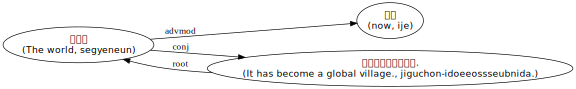

In [3]:
from sagas.nlu.corenlp_helper import LangDialect as dia
dia('ko').ana('이제 세계는 지구촌이되었습니다.')  # with word translation